# Colour - HDRI - Examples: Absolute Luminance Calibration & Photometric Exposure Conversion

Through this example, a [HDR image courtesy of Unity Technologies](https://blog.selfshadow.com/publications/s2016-shading-course/unity/supplemental/index.html) will be calibrated for absolute *Luminance* using the method described in Lagarde (2016) and, then, subsequently converted to photometric exposure in $lx.s$.

In [1]:
import os

import colour

from colour_hdri import (
    ROOT_RESOURCES_EXAMPLES,
    absolute_luminance_calibration_Lagarde2016,
    exposure_value_100,
    photometric_exposure_scale_factor_Lagarde2014,
    saturation_based_speed_focal_plane_exposure,
    upper_hemisphere_illuminance_weights_Lagarde2016,
)

ROOT_RESOURCES = os.path.join(ROOT_RESOURCES_EXAMPLES, "unity_001")

colour.plotting.colour_style()

colour.utilities.describe_environment();

*                                                                             *
*   Interpreter :                                                             *
*       python : 3.10.8 (main, Oct 12 2022, 09:32:59) [Clang 14.0.0           *
*   (clang-1400.0.29.102)]                                                    *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : 0.4.1                                                        *
*       colour-hdri : v0.1.8-156-g0bc7147                                     *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.22.1                                                      *
*       matplotlib : 3.6.1                                                    *
*       numpy : 1.23.4                  

## Absolute Luminance Calibration

The *Treasure Island 1* HDR image [description](https://blog.selfshadow.com/publications/s2016-shading-course/unity/supplemental/index.html) is given here:

```
HDRI name: Treasure Island 1
Location: Treasure Island - San Francisco
Date: 13/03/2016
Time: 10h15
Weather: Some clouds

Range:

Standard capture: 
- 9 shots by view
- 8 EV (1/4000 - 1/15")

ND Filter capture: 
- 15 shots by view
- ND Filter: 1000 + 32 (-15 stops)
- 14 EV (1/2000 - 8")  (HDRI shot a bit before new table provided in the document.
                        We have shot up to 8 shutter speeds with ND Filter.)

Total range: 23 EV

Setting Camera:
EV Step: 1
F/8
ISO 100
Lux: 51000
Luminance on 60 % white patch: 6700
```

The value of interest to perform the absolute luminance calibration is the metered illuminance: $51000lx$, it is commonly obtained by measuring illuminance of the upper hemisphere with a light meter.

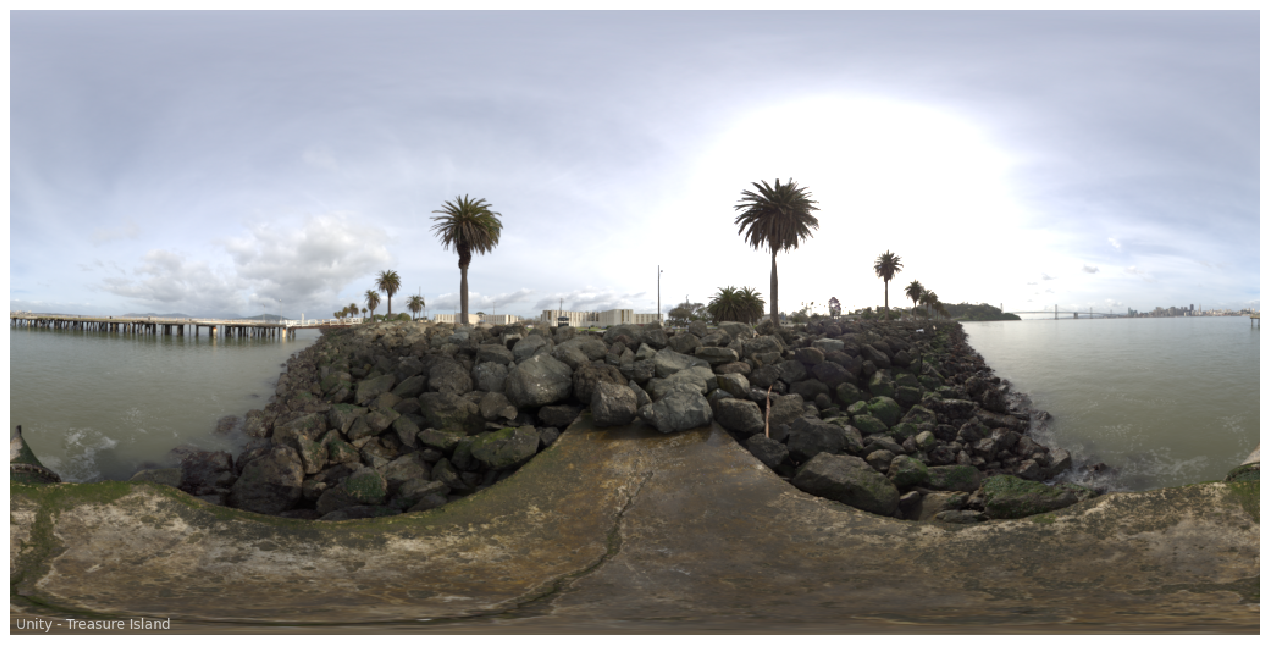

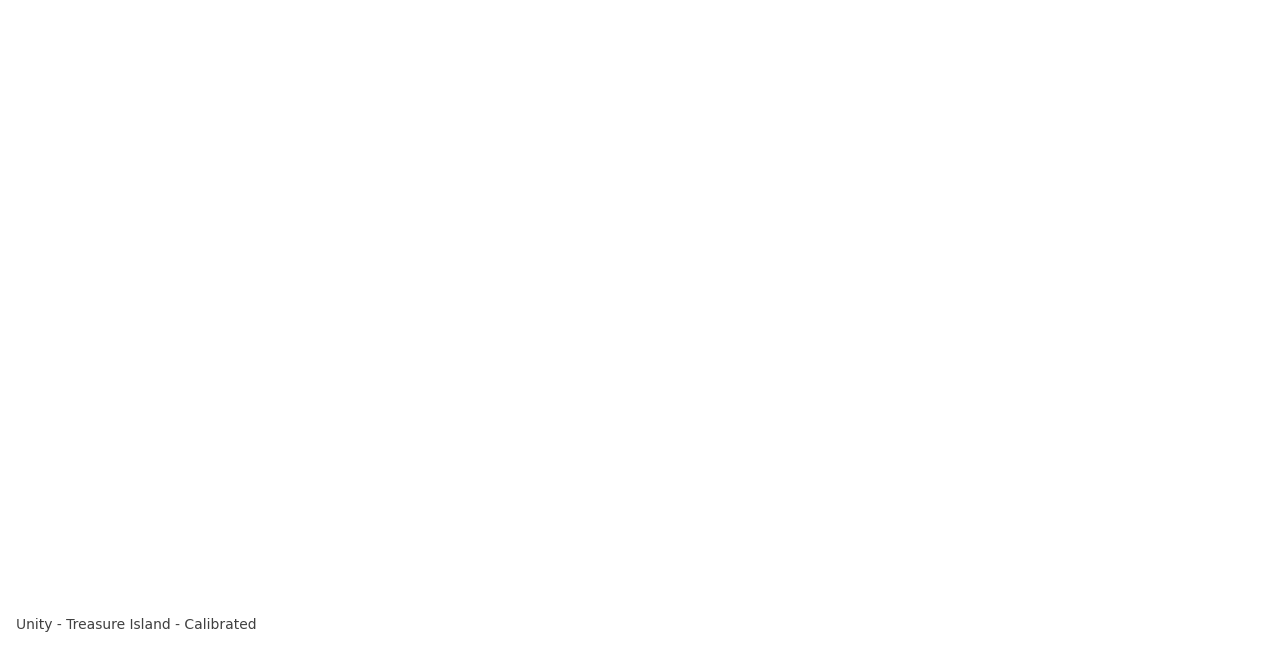

In [2]:
HDRI_IMAGE = colour.read_image(
    os.path.join(ROOT_RESOURCES, "Unity_Treasure_Island_White_Balanced.exr")
)

colour.plotting.plot_image(
    colour.cctf_encoding(HDRI_IMAGE),
    text_kwargs={"text": "Unity - Treasure Island"},
)

HDRI_IMAGE_C = absolute_luminance_calibration_Lagarde2016(HDRI_IMAGE, 51000)

colour.plotting.plot_image(
    colour.cctf_encoding(HDRI_IMAGE_C),
    text_kwargs={
        "text": "Unity - Treasure Island - Calibrated",
        "color": "black",
    },
);

## Upper Hemisphere Illuminance Weights

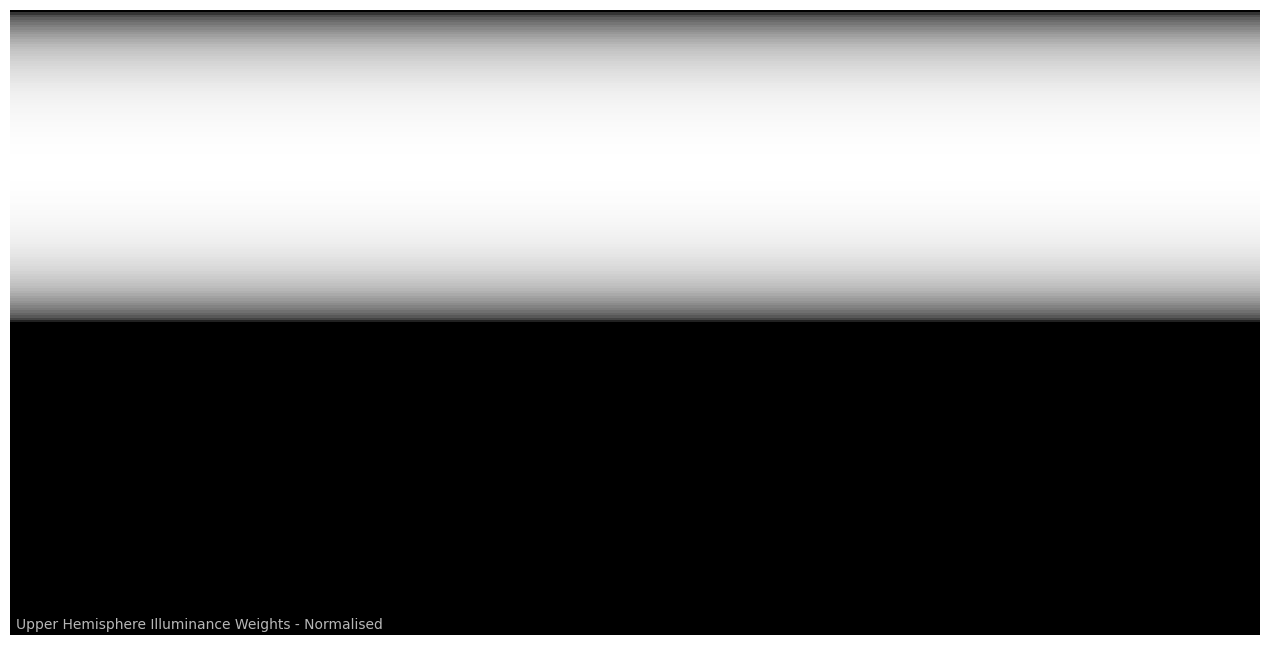

In [3]:
colour.plotting.plot_image(
    colour.cctf_encoding(
        colour.algebra.normalise_maximum(
            upper_hemisphere_illuminance_weights_Lagarde2016(256, 512)
        )
    ),
    text_kwargs={"text": "Upper Hemisphere Illuminance Weights - Normalised"},
);

## Photometric Exposure Conversion - Digital Still Camera (DSC) Exposure Model

After calibration to absolute luminance, the HDR image can be transformed to photometric exposure, i.e. focal plane exposure, in $lx.s$ according to the model of a typical Digital Still Camera (DSC). _Exposing_ the HDR image using the Saturation-Based Speed (SBS) method as given in the *ISO12232-2006* standard and typical DSC exposure controls is done as follows:

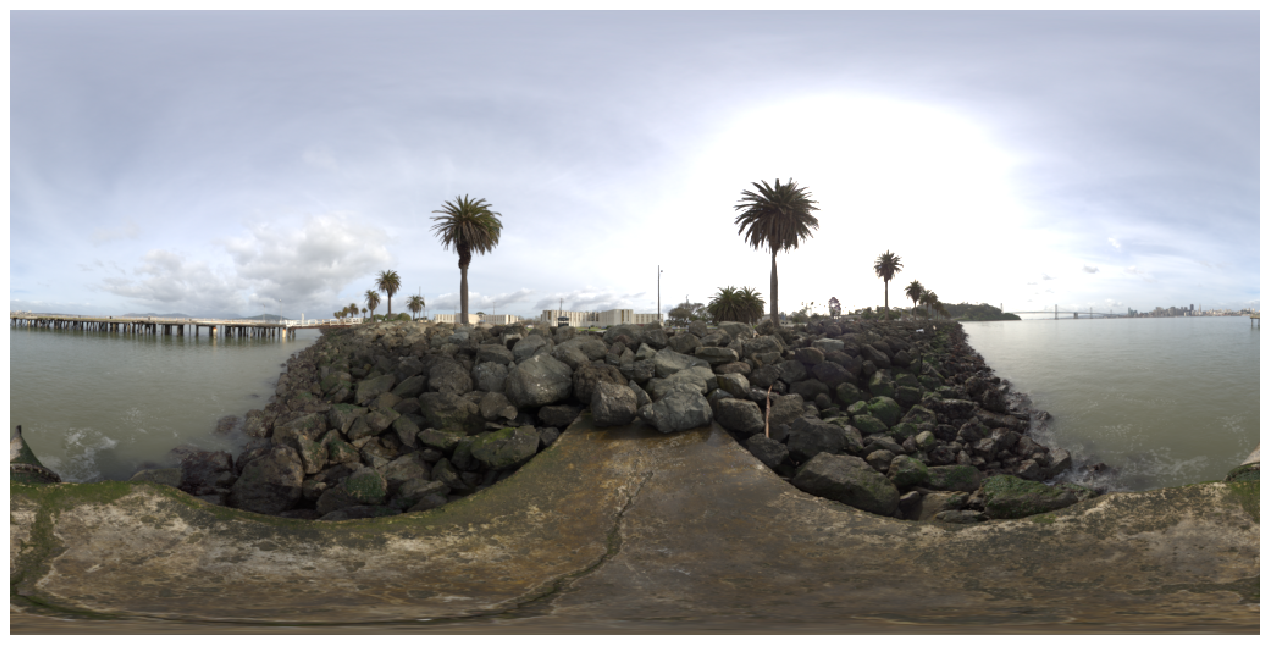

In [4]:
F_NUMBER = 8
EXPOSURE_TIME = 1 / 125
ISO = 100
# Assuming a 8mm focal length.
FOCAL_LENGTH = 8 / 1000
# Assuming a 50m object distance.
IMAGE_DISTANCE = 1 / (-1 / 50 + 1 / FOCAL_LENGTH)
# Flare in lx.s.
FLARE = 0

HDRI_IMAGE_E = saturation_based_speed_focal_plane_exposure(
    HDRI_IMAGE_C,
    F_NUMBER,
    EXPOSURE_TIME,
    ISO,
    FOCAL_LENGTH,
    IMAGE_DISTANCE,
    FLARE,
)

colour.plotting.plot_image(
    colour.cctf_encoding(HDRI_IMAGE_E),
    tex_kwargs={
        "text": f"Unity - Treasure Island - f{F_NUMBER} - {EXPOSURE_TIME}s - {ISO}"
    },
);

Alternatively, the HDR image can be exposed using Lagarde and de Rousiers (2014) formulation derived from the *ISO12232-2006* standard:

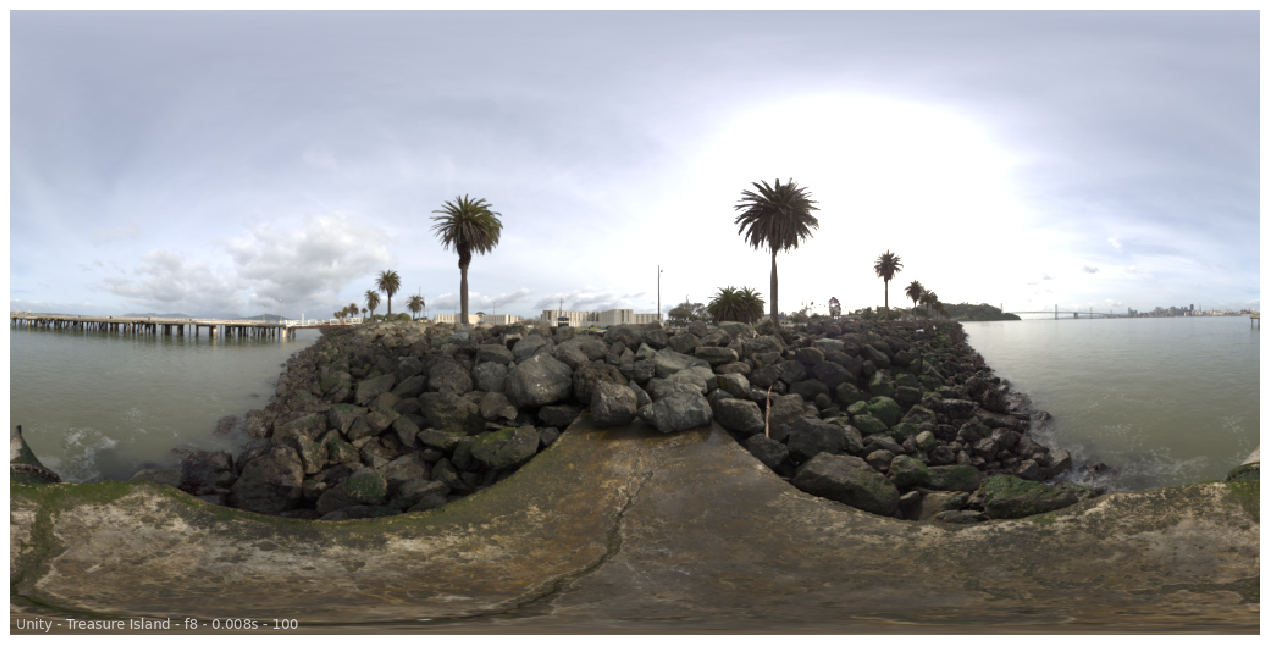

In [5]:
EV100 = exposure_value_100(F_NUMBER, EXPOSURE_TIME, ISO)
H_SF = photometric_exposure_scale_factor_Lagarde2014(EV100)

HDRI_IMAGE_E = HDRI_IMAGE_C * H_SF

colour.plotting.plot_image(
    colour.cctf_encoding(HDRI_IMAGE_E),
    text_kwargs={
        "text": f"Unity - Treasure Island - f{F_NUMBER} - {EXPOSURE_TIME}s - {ISO}"
    },
);